In [15]:
import pandas as pd
import numpy as np
from numpy import log as ln
import matplotlib.pyplot as plt

In [16]:
# Observed data

y1 = 125
y2 = 18
y3 = 20
y4 = 34

In [ ]:
# Observed Log-likelihood 계산 함수
def logL(theta):
    logL = y1*ln((2 + theta)/4) + y2*ln((1-theta) / 4) +y3*ln((1-theta) / 4) + y4*ln(theta/4)
    return logL

# SEM 으로 Variance 계산하는 함수
def SEM(mle):
    I_com =( ( (y1*mle) / (mle+2) ) + y4 ) / mle**2 + ( (y2+y3) / (1-mle)**2 )
    DM = (2*((y1+y4)*(y2+y3+y4) - y4*(y1+y2+y3+y4))) / ((y1+y2+y3+y4)*mle + 2*(y1+y2+y3+y4))**2
    variance = (1 / I_com) * (1 / (1 - DM))
    return variance

# Louis's method로 Variance 계산하는 함수
def louis(mle):
    I_com =( ( (y1*mle) / (mle+2) ) + y4 ) / mle**2 + ( (y2+y3) / (1-mle)**2 )
    var_partial_log_L_com = (y1/mle**2)*(mle / (mle+2))*(2 / (mle+2))
    variance = 1 / (I_com - var_partial_log_L_com)
    return variance


In [38]:
# EM algorithm

max_iter = 100
tolerance = 1e-12
converged = False
theta = 0.1 # initial theta value
log_L = [logL(0.1)]
theta_list = [theta]

for i in range(max_iter) :
    
    # Calculate new theta
    theta1 =( ( (y1 * theta) / (theta + 2) ) + y4 ) / ( (y1 * theta) / (theta + 2) + y2 + y3 + y4) 
    
    # current observed log-likelihood
    current_log_likelihood = logL(theta1)
    prev_log_likelihood = logL(theta)
    
    # Observed log-likelihood list & theta list for graph. 
    log_L.append(logL(theta1))
    theta_list.append(theta1)
        
    # Check convergence criteria
    # Iteration stopped when satisfying two stopping rules. 
    if abs(current_log_likelihood - prev_log_likelihood) < tolerance and np.sqrt((theta1 - theta)**2) < tolerance:
        converged = True
        break
    
    # Update theta for next iteration
    theta = theta1

if converged:
    print("MLE by EM : {}".format(theta1))
    print("Variance of MLE by SEM : {}".format(SEM(theta1)))
    print("Variance of MLE by Louis' method : {}".format(louis(theta1)))

MLE by EM : 0.6268214978709155
Variance of MLE by SEM : 0.0023816630136419994
Variance of MLE by Louis' method : 0.002648888033766768


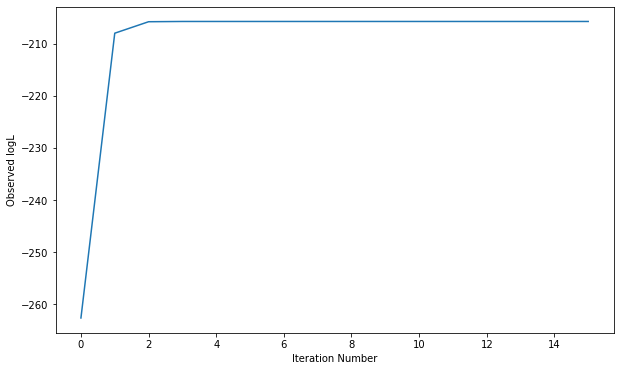

In [22]:
# observed likelihood가 증가하는 그래프
x = list(range(len(log_L)))

fig, ax = plt.subplots(figsize=(10,6))

plt.plot(x, log_L)
plt.xlabel('Iteration Number')
plt.ylabel('Observed logL')

plt.show()

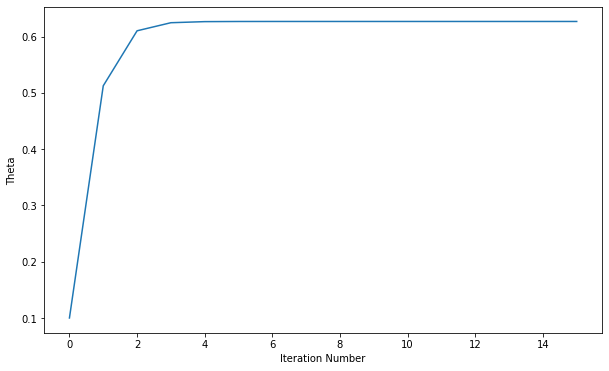

In [23]:
# theta가 수렴하는 그래프

x = list(range(len(log_L)))

fig, ax = plt.subplots(figsize=(10,6))

plt.plot(x, theta_list)
plt.xlabel('Iteration Number')
plt.ylabel('Theta')

plt.show()